<a href="https://colab.research.google.com/github/khalil-alexander/get_forecast/blob/main/FuturePosition_ValueofISS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="red"> Pip install Astropy in google colab <font/>
### <font color="Green"> We install astropy in order to convert kilometre to longitatide later <font/>

In [1]:
!pip install astropy
!pip install country_converter
!pip install shapely
!pip install cartopy
!pip install geopandas
!pip install movingpandas
!pip install hvplot
!pip install holoviews
!pip install geoviews
!pip install global_land_mask
!pip install reverse_geocode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 694.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.4 MB/s eta 0:00:00


## <font color="red"> Install Moudles in google colab <font/>

In [2]:
from astropy import coordinates as coord
from astropy import units as u
from astropy import time
from astropy.time import Time
from astropy.coordinates import Angle

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as reqs
import xml.etree.ElementTree as ET
import io
import pprint
import json
import datetime

In [4]:
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from geopy.geocoders import Nominatim

/usr/local/lib/python3.10/dist-packages/movingpandas/__init__.py:41: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.cm as mcm

In [6]:
import cartopy
import cartopy.crs as ccrs
import country_converter as coco
from cartopy.feature.nightshade import Nightshade
from global_land_mask import globe

In [7]:
from shapely import geometry as shpgeom
from shapely import wkt as shpwkt

In [8]:
import holoviews as hv
import hvplot.pandas
import geoviews

In [9]:
import os
from pathlib import Path
import datetime as dt
from datetime import timezone

In [10]:
from datetime import datetime
import datetime as dt
from datetime import timezone

In [11]:
import xarray as xr

In [12]:
from global_land_mask import globe
import reverse_geocode

# <font color="red">Why is the International Space Station (ISS) important?<font/>

### <font color="blue">The ISS hosts research for new space technologies, microbiology, studying diseases, and physics through microgravity. The ISS is the largest statilte that orbits the earth.<font/>


# <font color="red">What is a orbit?<font/>

### <font color="blue">An orbit is when the ISS crosses the antimeridian<font/>


# <font color="red">What do we need to know?<font/>
- ## <font color="blue">Astropy <font/>
- ## <font color="blue"> Datetime <font/>
- ## <font color="blue">Pandas <font/>
- ## <font color="blue">Xarray <font/>


## <font color="red">What is Astropy? <font/>
### <font color="blue">Astropy is a Python package designed specifically for astronomy. There are tools that handle units which will be useful for us later. <font/>


## <font color="red">What is Datetime?
### <font color="blue">Datetime is a Python module that provides classes for dates and time. We use datetime to get real time data for the ISS position<font/>

## <font color="red">What is Pandas?
### <font color="blue">An open source python libary used for data manipulation and analysis <font/>

## <font color="red">What is Xarray?
### <font color="blue">An open source project and Python package that works with multi-dimensional data<font/>

## <font color="red"> Converting coordinates to Latitude and Longitude ISS</font>
### <font color="blue"> Using astropy we were able to convery kilometre to longitude and latitude. <font/>

In [13]:
now = Time("2024-03-07 00:46:00.000", scale='utc')
xyz = [1155.746046202530, -6632.420367726780, 953.533229633281]
cartrep = coord.CartesianRepresentation(*xyz, unit=u.km)



gcrs = coord.GCRS(cartrep, obstime = now)
itrs = gcrs.transform_to(coord.ITRS(obstime = now))
loc = coord.EarthLocation(*itrs.cartesian.xyz)

print(loc.lat, loc.lon, loc.height)

8d07m57.90103915s 103d26m20.85144985s 421.8445702007271 km


## <font color="red"> Creating functions to clean up Latitude and Longitude ISS <font/>

### <font color="green">Create an empty dateframe for functions <font/>

### <font color="blue">Create two function that changes km to lat/lon <font/>


<font color="Burgundy"> First an empty pandas dataframe with only 7 column names were created. The pandas dataframe will help store the data in a two-dimentional data structure. This will help to store the data from web scraping later.<font/>


In [14]:
col_name = ['Date','x units(km)','y units(km)','z units(km)','x_dot(km/s)','y_dot(km/s)','z_dot(km/s)']
# Challenge to have the columns read under beautiful soup
xml_df = pd.DataFrame(columns=col_name)
xml_df

,Date,x units(km),y units(km),z units(km),x_dot(km/s),y_dot(km/s),z_dot(km/s)


<font color="Burgundy"> We create a functions to convert the x units and y units to latitude and longitude that we will have in our Pandas dataframe that we previously created through astropy.<font/>

In [15]:
def create_latlon_positions(date: str, xyz: list[float]):
    now = Time(date, scale='utc')
    cartrep = coord.CartesianRepresentation(*xyz, unit=u.km)

    gcrs = coord.GCRS(cartrep, obstime = now)
    itrs = gcrs.transform_to(coord.ITRS(obstime = now))
    loc = coord.EarthLocation(*itrs.cartesian.xyz)

    return Angle(loc.lat).deg, Angle(loc.lon).deg


In [16]:
def get_latlon(row: pd.Series):
    date = row['Date'].strftime('%Y-%m-%d %H:%M:%S')
    xyz = [row['x units(km)'], row['y units(km)'], row['z units(km)']]
    return create_latlon_positions(date, xyz)




## <font color="red"> read_xml_DateFrame <font/>
### <font color="green">A function that reads an xml file and returns the specfic position the iss is at during different time. <font/>

<font color="blue"> We pass in the url of an XML file:https://nasa-public-data.s3.amazonaws.com/iss-coords/current/ISS_OEM/ISS.OEM_J2K_EPH.xml
<font color="blue"> We use the XML file to webscrap data on the the position of the ISS and time the ISS was in that posistion.

<font color="blue"> In order to clean up the data we use Beautifulsoup

### <font color="green">What is Beautifulsoup? <font/>

<font color="blue">Beautifulsoup is a python libary that is used to pull XML and HTML files. In this case we want to pull out an XML file. <font/>

<font color="blue">The XML file we used to extract data from: https://nasa-public-data.s3.amazonaws.com/iss-coords/current/ISS_OEM/ISS.OEM_J2K_EPH.xml <font/>

In [17]:
def read_xml_DataFrame(url):
    """
    Do web scraping from an XML file to obtain time the International Space
    Station will be at a specfic postion and the speed it is going at.

    Parameters
    ----------
    url : String
        The url of the data in XML format you want to extract from.

    Return
    ------
    df : Pandas DataFrame
        The DataFrame containing the time the International Space Station is at
        a specfic position and the speed it is traveling.
    """
    # Get the xml request
    xml = reqs.get(url)

    # Use BeautifulSoup to Organize the XML file
    soup = BeautifulSoup(xml.content,"lxml")

    # Finds all the instances 'statevector' appeared in the xml file
    state_tag = soup.find_all('statevector')

    col_name = ['Date','x units(km)',
                'y units(km)','z units(km)',
                'x_dot(km/s)',
                'y_dot(km/s)','z_dot(km/s)']
    df = pd.DataFrame(columns=col_name)

    #Loops thorugh all elements to add rows in the empty xml_df
    for element in state_tag:
        # Turns element into text and splits the '\n'
        element = element.text.split('\n')
        # Deletes First empty String
        element.pop(0)
        # Deletes Last empty Sting
        element.pop(-1)
        # Removes the 'Z' in the elements first index
        element[0] = element[0][:-1]

        # Appending list into DataFrame by adding 1 row to the DataFrame
        #df = xml_df.append(pd.DataFrame(element, columns=col_name), ignore_index=True)
        df.loc[len(df)] = element


    # Turns the "Date" collumn into a Datetime object
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%jT%H:%M:%S.%f')
    # Sets the "Date" collumn into a Datetime object
    #df.set_index("Date", inplace=True)

    # Returns the Dataframe
    return df

In [18]:
xml_url = "https://nasa-public-data.s3.amazonaws.com/iss-coords/current/ISS_OEM/ISS.OEM_J2K_EPH.xml"
%time df = read_xml_DataFrame(xml_url)

<ipython-input-17-ea97148a76b9>:21: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(xml.content,"lxml")


CPU times: user 9.17 s, sys: 160 ms, total: 9.33 s
Wall time: 9.6 s


In [19]:
df

,Date,x units(km),y units(km),z units(km),x_dot(km/s),y_dot(km/s),z_dot(km/s)
0,2025-01-13 12:00:00,4038.7930950587602,-3705.0482491806301,-4025.1939943708699,6.1119953945499796,2.3943852299208701,3.9345731737537699
1,2025-01-13 12:04:00,5341.4149620317003,-3002.9906249425298,-2945.9802194699901,4.6766844422316698,3.42073556212056,5.0042248056743004
2,2025-01-13 12:08:00,6256.1641715923697,-2082.8985555475801,-1652.27751743366,2.8992696473676598,4.20012722695229,5.71085793676155
3,2025-01-13 12:12:00,6715.9474414906899,-1011.35475637097,-238.11199733685601,0.90845555950806001,4.6749493185734803,6.0017212974119198
4,2025-01-13 12:16:00,6686.7644073911697,133.80329520081099,1193.4149424182001,-1.15039929717603,4.8096969892350696,5.8545081829422996
...,...,...,...,...,...,...,...
5397,2025-01-28 11:45:00,1690.6229761795801,5748.7739300839003,3189.9655770352001,-4.4638705437301001,3.9824769528250998,-4.7950383615516898
5398,2025-01-28 11:49:00,570.68951016424796,6483.2587755463701,1936.54658424276,-4.8117662419433298,2.1006952941303898,-5.5859996695779897
5399,2025-01-28 11:53:00,-590.87427342240403,6744.8288587216102,541.45839674851595,-4.8086615933573702,0.065816341779009996,-5.9683281040335103
5400,2025-01-28 11:57:00,-1709.35579450352,6514.5615395053501,-893.24132763776299,-4.4550315760282597,-1.9726751425181399,-5.9141361635607899


#### <font color="green">Adds latitude and longitude to the Data Frame <font/>

<font color="Burgundy"> We use the get_latlon function to have the dataframe return only the date, latitude, and longitude <font/>

In [20]:
%time df[['lat','lon']] = df.apply(get_latlon, axis=1, result_type='expand')

CPU times: user 53.7 s, sys: 1.03 s, total: 54.8 s
Wall time: 54.6 s


## <font color="red">Confrim if lat is below 50 and above -50 <font/>
### <font color="green">We do this because the International Space Station does not travel past 50 and -50 degrees latitude. <font/>

### <font color="green">verify_latitude function <font/>
- <font color="blue">Returns the min and max latitude in a tuple so the observer can see if the latitude matches the International Space Station path. <font/>

In [21]:
def check_latitude(df: pd.DataFrame):
    """
    Gives the minimum and maximum latitude of the path the ISS travels in a
    DataFrame.

    Parameters
    ----------
    df : Pandas Dataframe
        The url of the data in XML format you want to extract from.

    Return
    ------
    df : Tuple
        Returns df max and min latitude.
    """
    return df['lat'].min(), df['lat'].max()

<font color="Burgundy"> We see that the latitude goes up to 52 degrees which could happen with error from translating y units to latitude. <font/>

In [22]:
check_latitude(df)

(-51.7940901242887, 51.79429409607232)

In [23]:
df = df[['Date','lat','lon']]

In [24]:
df

,Date,lat,lon
0,2025-01-13 12:00:00,-36.364652,24.638470
1,2025-01-13 12:04:00,-25.696634,36.786255
2,2025-01-13 12:08:00,-14.020421,46.692010
3,2025-01-13 12:12:00,-1.882071,55.529168
4,2025-01-13 12:16:00,10.320321,64.235957
...,...,...,...
5397,2025-01-28 11:45:00,28.220393,129.759904
5398,2025-01-28 11:49:00,16.683787,140.084681
5399,2025-01-28 11:53:00,4.590958,149.088738
5400,2025-01-28 11:57:00,-7.635565,157.752655


## <font color="red">Functions <font/>

#### <font color="blue"> The functions below are used to only extract the ISS position for 6 hours. We also make sure to obtain only the future dates, we have a parameter nhours the controls how many hours from the current time to start collecting data. If you do not pass in anything for nhours the defult value will be 3. <font/>

### 1. <font color="green">obtain_future_date <font/>
- <font color="blue">A function where you take the have argurements Pandas Dataframe and nhours.
The function takes the current time and adds in by nhours which the default is three. You will pass in a Pandas dataframe that will take the future values between startdate and 24 hours ahead. <font/>



In [115]:
def obtain_future_date(df: pd.DataFrame, nhours: int=3):
    """
    Collects future position of the ISS with nhours from current time and 6
    hours ahead of nhours

    Parameters
    ----------
    df : Pandas Dataframe
        Dataframe which contains a column with datetime objects.

    nhours: Int
        Number of hours you want to start collecting data from current time.

    Return
    ------
    df : Pandas DataFrame
        The DataFrame containing the time the International Space Station
        from current time + nhours to 6 hours ahead.
    """
    # String of the current time of day now
    start_date = dt.datetime.now() + dt.timedelta(hours=nhours)
    #end_date = start_date + dt.timedelta(hours=24)
    # Turns the date from a string object to a datetime object
    start_date = start_date.strftime("%m/%d/%Y %H:%M:%S")
    start_date = pd.to_datetime(start_date, format='%m/%d/%Y %H:%M:%S')

    end_date = start_date + dt.timedelta(hours=6)
    #end_date = end_date.strftime("%m/%d/%Y %H:%M:%S")
    #end_date = pd.to_datetime(start_date, format='%m/%d/%Y %H:%M:%S')
    #return (start_date, end_date)

    return df[(start_date <= df['Date']) & (end_date >= df['Date'])]

<font color="Burgundy"> We aranged the index of the Dataframe <font/>

In [26]:
df1 = obtain_future_date(df)
df1.index = range(len(df1))

In [27]:
df1

,Date,lat,lon
0,2025-01-15 21:28:00,0.814969,-95.523694
1,2025-01-15 21:32:00,12.981321,-86.727060
2,2025-01-15 21:36:00,24.735975,-76.935281
3,2025-01-15 21:40:00,35.545338,-64.991950
4,2025-01-15 21:44:00,44.553461,-49.427858
...,...,...,...
85,2025-01-16 03:08:00,-42.749065,44.111780
86,2025-01-16 03:12:00,-49.436237,63.262210
87,2025-01-16 03:16:00,-51.791203,86.376177
88,2025-01-16 03:20:00,-49.049667,109.290705


<font color="Burgundy"> Rename the column from 'Date' to 't', this will be useful later for time interpolation using an xarray.<font/>

In [28]:
df1.rename(columns={'Date': 't',}, inplace=True)

<ipython-input-28-f5fb0ce3a68a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Date': 't',}, inplace=True)


# <font color="red"> Time interpoltation<font/>

In [29]:
df1

,t,lat,lon
0,2025-01-15 21:28:00,0.814969,-95.523694
1,2025-01-15 21:32:00,12.981321,-86.727060
2,2025-01-15 21:36:00,24.735975,-76.935281
3,2025-01-15 21:40:00,35.545338,-64.991950
4,2025-01-15 21:44:00,44.553461,-49.427858
...,...,...,...
85,2025-01-16 03:08:00,-42.749065,44.111780
86,2025-01-16 03:12:00,-49.436237,63.262210
87,2025-01-16 03:16:00,-51.791203,86.376177
88,2025-01-16 03:20:00,-49.049667,109.290705


## <font color="red">Functions<font/>
###1. <font color="green"> get_orbit<font/>
#### <font color="blue">A function that creates a data frame with a full orbit. We determine a full orbit by getting the second instance where longitude switches from positive to negative.<font/>

In [30]:
def get_orbit(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']

    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            count += 1
            if count == 2:
                new_df = df.loc[low:i]
                return new_df
            low = i+1

In [31]:
df_orbit = get_orbit(df1)

<font color="Burgundy"> Set the date as the index and change the name from 'date' to 't' for time interpoltation later. <font/>

In [32]:
df_orbit.set_index('t', inplace=True)

In [33]:
df_orbit

,lat,lon
t,,
2025-01-15 22:44:00,-45.067153,-167.570226
2025-01-15 22:48:00,-36.259609,-151.760795
2025-01-15 22:52:00,-25.577231,-139.645012
2025-01-15 22:56:00,-13.894177,-129.757140
2025-01-15 23:00:00,-1.753900,-120.927086
2025-01-15 23:04:00,10.446456,-112.218093
2025-01-15 23:08:00,22.324718,-102.721324
2025-01-15 23:12:00,33.389593,-91.343217
2025-01-15 23:16:00,42.870784,-76.667270


## <font color="red"> Function <font/>
### <font color="green"> 1. count_orbit <font/>
#### <font color="blue"> A function that counts the amount of time in the dataframe where the longitude switched from positive to negative. This is how we determine the orbits. <font/>

In [34]:
def count_orbit(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']

    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            count += 1
            print(i, temp_df[i], temp_df[i+1])
    return count

In [35]:
orbit = count_orbit(df_orbit)

<ipython-input-34-ce539bacc193>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (temp_df[i] > 0) and (temp_df[i+1] < 0):


<font color="Burgundy"> Since we got a value of zero we can confrim the dataframe df_orbit is a full orbit. We can tell because the longitude starts from a value close to -180 and ends with a value clost to 180. <font/>

<font color="Burgundy"> If we got a value of 1 or more we know we got more than a full orbit. <font/>

In [36]:
orbit

0

In [37]:
df_orbit

,lat,lon
t,,
2025-01-15 22:44:00,-45.067153,-167.570226
2025-01-15 22:48:00,-36.259609,-151.760795
2025-01-15 22:52:00,-25.577231,-139.645012
2025-01-15 22:56:00,-13.894177,-129.757140
2025-01-15 23:00:00,-1.753900,-120.927086
2025-01-15 23:04:00,10.446456,-112.218093
2025-01-15 23:08:00,22.324718,-102.721324
2025-01-15 23:12:00,33.389593,-91.343217
2025-01-15 23:16:00,42.870784,-76.667270


## <font color="red"> Getting full orbit <font/>

## <font color="green"> xarray <font/>

In [38]:
def changeto_xarray(df):
    """
    Using a previous DataFrame and converting it into an Xarray.

    Parameters
    ----------
    df : Pandas DataFrame



    Return
    ------
    ds : Xarray
        The Xarray containing the collected following data variables:
        Date, Latitude(lat), and Longitude(lon).

    """

    #Converts the hourly  DateTime object to an Xarray object which return a more percise time with it's weather conditions
    ds = df.to_xarray()

    return ds

In [39]:
len(df_orbit)

24

In [40]:
test_ds = changeto_xarray(df_orbit)

In [41]:
test_ds

<xarray.Dataset> Size: 576B
Dimensions:  (t: 24)
Coordinates:
  * t        (t) datetime64[ns] 192B 2025-01-15T22:44:00 ... 2025-01-16T00:16:00
Data variables:
    lat      (t) float64 192B -45.07 -36.26 -25.58 ... -51.03 -51.24 -46.56
    lon      (t) float64 192B -167.6 -151.8 -139.6 -129.8 ... 119.8 143.5 164.9

In [42]:
df_orbit

,lat,lon
t,,
2025-01-15 22:44:00,-45.067153,-167.570226
2025-01-15 22:48:00,-36.259609,-151.760795
2025-01-15 22:52:00,-25.577231,-139.645012
2025-01-15 22:56:00,-13.894177,-129.757140
2025-01-15 23:00:00,-1.753900,-120.927086
2025-01-15 23:04:00,10.446456,-112.218093
2025-01-15 23:08:00,22.324718,-102.721324
2025-01-15 23:12:00,33.389593,-91.343217
2025-01-15 23:16:00,42.870784,-76.667270


In [43]:
#start_date =
df_orbit.index

DatetimeIndex(['2025-01-15 22:44:00', '2025-01-15 22:48:00',
               '2025-01-15 22:52:00', '2025-01-15 22:56:00',
               '2025-01-15 23:00:00', '2025-01-15 23:04:00',
               '2025-01-15 23:08:00', '2025-01-15 23:12:00',
               '2025-01-15 23:16:00', '2025-01-15 23:20:00',
               '2025-01-15 23:24:00', '2025-01-15 23:28:00',
               '2025-01-15 23:32:00', '2025-01-15 23:36:00',
               '2025-01-15 23:40:00', '2025-01-15 23:44:00',
               '2025-01-15 23:48:00', '2025-01-15 23:52:00',
               '2025-01-15 23:56:00', '2025-01-16 00:00:00',
               '2025-01-16 00:04:00', '2025-01-16 00:08:00',
               '2025-01-16 00:12:00', '2025-01-16 00:16:00'],
              dtype='datetime64[ns]', name='t', freq=None)

<font color="Burgundy">We take the first index and add 5 seconds and turn that variable into start_date. We then turn the start_date object and turn it from a timestamp object to a string. <font/>

<font color="Burgundy"> We then take the last index and subtract 5 secondsand turn that variable into end_date. We then turn the end_date object and turn it from a timestamp object to a string. <font/>

In [44]:
start_date = df_orbit.index[0] + dt.timedelta(seconds=5)

In [45]:
start_date = datetime.fromtimestamp(start_date.timestamp())
start_date = start_date.strftime('%Y-%m-%dT%H:%M:%S')

In [46]:
type(start_date)

str

In [47]:
end_date = df_orbit.index[-1] - dt.timedelta(seconds=5)

In [48]:
end_date = datetime.fromtimestamp(end_date.timestamp())
end_date = end_date.strftime('%Y-%m-%dT%H:%M:%S')

In [49]:
type(end_date)

str

In [50]:
end_date

'2025-01-16T00:15:55'

In [51]:
# Create a date range for interpolation

# Start date + 5 seconds
# End date - 5 seconds

new_dates = pd.date_range(start_date, end_date, freq='20s')

In [52]:
new_dates

DatetimeIndex(['2025-01-15 22:44:05', '2025-01-15 22:44:25',
               '2025-01-15 22:44:45', '2025-01-15 22:45:05',
               '2025-01-15 22:45:25', '2025-01-15 22:45:45',
               '2025-01-15 22:46:05', '2025-01-15 22:46:25',
               '2025-01-15 22:46:45', '2025-01-15 22:47:05',
               ...
               '2025-01-16 00:12:45', '2025-01-16 00:13:05',
               '2025-01-16 00:13:25', '2025-01-16 00:13:45',
               '2025-01-16 00:14:05', '2025-01-16 00:14:25',
               '2025-01-16 00:14:45', '2025-01-16 00:15:05',
               '2025-01-16 00:15:25', '2025-01-16 00:15:45'],
              dtype='datetime64[ns]', length=276, freq='20s')

<font color="Burgundy"> We interpolate the data in test_ds with the new_dates <font/>

In [53]:
test_ds

<xarray.Dataset> Size: 576B
Dimensions:  (t: 24)
Coordinates:
  * t        (t) datetime64[ns] 192B 2025-01-15T22:44:00 ... 2025-01-16T00:16:00
Data variables:
    lat      (t) float64 192B -45.07 -36.26 -25.58 ... -51.03 -51.24 -46.56
    lon      (t) float64 192B -167.6 -151.8 -139.6 -129.8 ... 119.8 143.5 164.9

In [54]:
# Interpolate data to the new date range using linear interpolation

interpolated_data = test_ds.interp(t=new_dates, method='linear')



print(interpolated_data)

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-15T22:44:05 ... 2025-01-16T00:15:45
Data variables:
    lat      (t) float64 2kB -44.88 -44.15 -43.42 ... -47.63 -47.24 -46.85
    lon      (t) float64 2kB -167.2 -165.9 -164.6 -163.3 ... 160.0 161.8 163.6


<font color="Burgundy"> Now we have data every 20 seconds in a full orbit <font/>

In [55]:
interpolated_data

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-15T22:44:05 ... 2025-01-16T00:15:45
Data variables:
    lat      (t) float64 2kB -44.88 -44.15 -43.42 ... -47.63 -47.24 -46.85
    lon      (t) float64 2kB -167.2 -165.9 -164.6 -163.3 ... 160.0 161.8 163.6

In [56]:
interpolated_data.lon

<xarray.DataArray 'lon' (t: 276)> Size: 2kB
array([-1.67240863e+02, -1.65923411e+02, -1.64605958e+02, -1.63288505e+02,
       -1.61971053e+02, -1.60653600e+02, -1.59336148e+02, -1.58018695e+02,
       -1.56701242e+02, -1.55383790e+02, -1.54066337e+02, -1.52748885e+02,
       -1.51508383e+02, -1.50498734e+02, -1.49489086e+02, -1.48479437e+02,
       -1.47469789e+02, -1.46460140e+02, -1.45450491e+02, -1.44440843e+02,
       -1.43431194e+02, -1.42421545e+02, -1.41411897e+02, -1.40402248e+02,
       -1.39439014e+02, -1.38615025e+02, -1.37791036e+02, -1.36967047e+02,
       -1.36143057e+02, -1.35319068e+02, -1.34495079e+02, -1.33671089e+02,
       -1.32847100e+02, -1.32023111e+02, -1.31199122e+02, -1.30375132e+02,
       -1.29573181e+02, -1.28837343e+02, -1.28101505e+02, -1.27365667e+02,
       -1.26629830e+02, -1.25893992e+02, -1.25158154e+02, -1.24422316e+02,
       -1.23686478e+02, -1.22950641e+02, -1.22214803e+02, -1.21478965e+02,
       -1.20745649e+02, -1.20019900e+02, -1.19294150e+02, -1.18568401e+02,
       -1.17842651e+02, -1.17116902e+02, -1.16391152e+02, -1.15665403e+02,
       -1.14939653e+02, -1.14213904e+02, -1.13488154e+02, -1.12762405e+02,
       -1.12020243e+02, -1.11228846e+02, -1.10437449e+02, -1.09646051e+02,
       -1.08854654e+02, -1.08063256e+02, -1.07271859e+02, -1.06480462e+02,
       -1.05689064e+02, -1.04897667e+02, -1.04106270e+02, -1.03314872e+02,
       -1.02484280e+02, -1.01536105e+02, -1.00587929e+02, -9.96397533e+01,
       -9.86915777e+01, -9.77434021e+01, -9.67952265e+01, -9.58470508e+01,
...
        5.39952058e+01,  5.47377047e+01,  5.54802036e+01,  5.62227025e+01,
        5.69652015e+01,  5.77077004e+01,  5.84501993e+01,  5.91926982e+01,
        5.99599396e+01,  6.08014082e+01,  6.16428769e+01,  6.24843455e+01,
        6.33258142e+01,  6.41672828e+01,  6.50087514e+01,  6.58502201e+01,
        6.66916887e+01,  6.75331573e+01,  6.83746260e+01,  6.92160946e+01,
        7.01075298e+01,  7.11488644e+01,  7.21901990e+01,  7.32315337e+01,
        7.42728683e+01,  7.53142030e+01,  7.63555376e+01,  7.73968722e+01,
        7.84382069e+01,  7.94795415e+01,  8.05208762e+01,  8.15622108e+01,
        8.26843582e+01,  8.40489437e+01,  8.54135293e+01,  8.67781148e+01,
        8.81427004e+01,  8.95072859e+01,  9.08718714e+01,  9.22364570e+01,
        9.36010425e+01,  9.49656281e+01,  9.63302136e+01,  9.76947992e+01,
        9.91577219e+01,  1.00915656e+02,  1.02673590e+02,  1.04431525e+02,
        1.06189459e+02,  1.07947393e+02,  1.09705327e+02,  1.11463261e+02,
        1.13221196e+02,  1.14979130e+02,  1.16737064e+02,  1.18494998e+02,
        1.20306489e+02,  1.22278647e+02,  1.24250805e+02,  1.26222963e+02,
        1.28195121e+02,  1.30167280e+02,  1.32139438e+02,  1.34111596e+02,
        1.36083754e+02,  1.38055912e+02,  1.40028071e+02,  1.42000229e+02,
        1.43926246e+02,  1.45713839e+02,  1.47501432e+02,  1.49289025e+02,
        1.51076618e+02,  1.52864211e+02,  1.54651804e+02,  1.56439397e+02,
        1.58226990e+02,  1.60014583e+02,  1.61802176e+02,  1.63589769e+02])
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-15T22:44:05 ... 2025-01-16T00:15:45

In [57]:
interpolated_data.lat

<xarray.DataArray 'lat' (t: 276)> Size: 2kB
array([-44.88366211, -44.14970015, -43.41573819, -42.68177622,
       -41.94781426, -41.2138523 , -40.47989034, -39.74592838,
       -39.01196642, -38.27800446, -37.5440425 , -36.81008054,
       -36.03705953, -35.14686136, -34.2566632 , -33.36646503,
       -32.47626687, -31.5860687 , -30.69587053, -29.80567237,
       -28.9154742 , -28.02527604, -27.13507787, -26.2448797 ,
       -25.33383411, -24.36024624, -23.38665837, -22.4130705 ,
       -21.43948264, -20.46589477, -19.4923069 , -18.51871903,
       -17.54513116, -16.57154329, -15.59795542, -14.62436755,
       -13.64125422, -12.62956453, -11.61787483, -10.60618514,
        -9.59449544,  -8.58280574,  -7.57111605,  -6.55942635,
        -5.54773665,  -4.53604696,  -3.52435726,  -2.51266756,
        -1.4997262 ,  -0.48302982,   0.53366655,   1.55036293,
         2.56705931,   3.58375568,   4.60045206,   5.61714843,
         6.63384481,   7.65054118,   8.66723756,   9.68393393,
        10.69392001,  11.68377517,  12.67363033,  13.66348549,
        14.65334065,  15.64319581,  16.63305097,  17.62290613,
        18.61276129,  19.60261645,  20.59247161,  21.58232677,
        22.55523637,  23.47730928,  24.39938218,  25.32145509,
        26.24352799,  27.1656009 ,  28.0876738 ,  29.00974671,
...
        -7.56696736,  -8.57604206,  -9.58511677, -10.59419148,
       -11.60326619, -12.6123409 , -13.62141561, -14.63049031,
       -15.62885155, -16.59507236, -17.56129317, -18.52751399,
       -19.4937348 , -20.45995561, -21.42617643, -22.39239724,
       -23.35861805, -24.32483886, -25.29105968, -26.25728049,
       -27.20083298, -28.07638048, -28.95192799, -29.82747549,
       -30.703023  , -31.5785705 , -32.45411801, -33.32966551,
       -34.20521302, -35.08076052, -35.95630803, -36.83185554,
       -37.66534441, -38.37265737, -39.07997033, -39.7872833 ,
       -40.49459626, -41.20190923, -41.90922219, -42.61653516,
       -43.32384812, -44.03116109, -44.73847405, -45.44578701,
       -46.08149576, -46.50239185, -46.92328793, -47.34418402,
       -47.76508011, -48.18597619, -48.60687228, -49.02776836,
       -49.44866445, -49.86956054, -50.29045662, -50.71135271,
       -51.03156561, -51.04972897, -51.06789232, -51.08605568,
       -51.10421903, -51.12238238, -51.14054574, -51.15870909,
       -51.17687245, -51.1950358 , -51.21319915, -51.23136251,
       -51.14731558, -50.7566378 , -50.36596002, -49.97528224,
       -49.58460446, -49.19392668, -48.8032489 , -48.41257112,
       -48.02189334, -47.63121556, -47.24053778, -46.84986   ])
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-15T22:44:05 ... 2025-01-16T00:15:45

In [58]:
interpolated_data.lat.max()

<xarray.DataArray 'lat' ()> Size: 8B
array(51.72249783)

In [59]:
interpolated_data.lat.min()

<xarray.DataArray 'lat' ()> Size: 8B
array(-51.23136251)

<font color="Burgundy"> Test path of the ISS <font/>

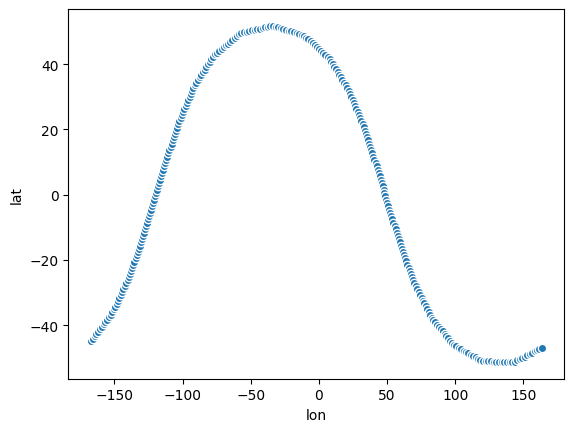

In [60]:
interpolated_data.plot.scatter(x='lon', y='lat')

<Axes: xlabel='lon', ylabel='lat'>

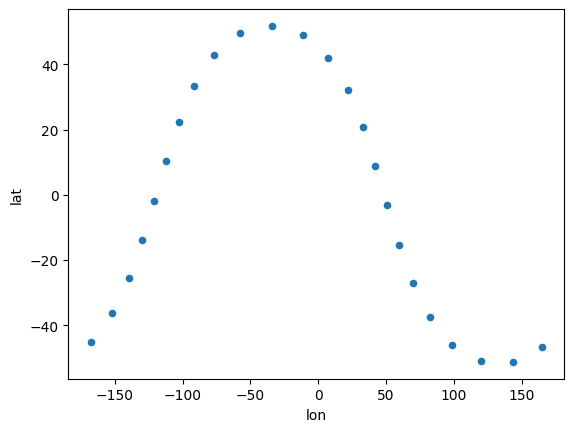

In [61]:
df_orbit.plot.scatter(x='lon', y='lat')

# ***Analysis of the ISS movement***

## <font color="red"> Read Future Locations of ISS</font>

<font color="blue">We change the interpolated data from a xarray back to a Pandas Dataframe.<font/>

<font color="blue">Pandas dataframe will be easier to manipulate for the next steps we will take.<font/>

In [62]:
df_orbit = interpolated_data.to_dataframe()

In [63]:
df_orbit

,lat,lon
t,,
2025-01-15 22:44:05,-44.883662,-167.240863
2025-01-15 22:44:25,-44.149700,-165.923411
2025-01-15 22:44:45,-43.415738,-164.605958
2025-01-15 22:45:05,-42.681776,-163.288505
2025-01-15 22:45:25,-41.947814,-161.971053
...,...,...
2025-01-16 00:14:25,-48.412571,156.439397
2025-01-16 00:14:45,-48.021893,158.226990
2025-01-16 00:15:05,-47.631216,160.014583


### <font color="green">Its important to track if the ISS is over land or not so we use the reverse_geocode module to see if the ISS is over land.<font/>

### <font color="green"> Get land_flag with the following:<font/>
<font color="blue">create get_land_flag function the with parameters<font/>
 - <font color="blue">latitude
 - longitude<font/>

In [64]:
# Writing a function to return if there is land in a given latitude/longitude
# Function returns 1 if there is land and returns 0 if there is ocean.
def get_land_flag(row):
    """
    Extract the land_flag given the latitude/longitude information.
    This function provides if there is land in a given latitude/longitude. If
    not then we can assume the given latitude/longitude is on the ocean.

    Parameters
    ----------
    lat : float
       Latitude of the location
    lon : float
       Longitude of the location

    Returns
    -------
    land_flag : boolen
       If land_flag is true or not
    """
    # Gets checks if there is land in the given latitude/longitude
    land_flag = globe.is_land(row['lat'],row['lon'])
    # Returns land flag
    return land_flag

In [65]:
#Apply function to add land flag to the dataframe
%time df_orbit['land_flag'] = df_orbit.apply(get_land_flag, axis=1, result_type='expand')

CPU times: user 77.5 ms, sys: 1.98 ms, total: 79.4 ms
Wall time: 86.2 ms


In [66]:
df_orbit

,lat,lon,land_flag
t,,,
2025-01-15 22:44:05,-44.883662,-167.240863,False
2025-01-15 22:44:25,-44.149700,-165.923411,False
2025-01-15 22:44:45,-43.415738,-164.605958,False
2025-01-15 22:45:05,-42.681776,-163.288505,False
2025-01-15 22:45:25,-41.947814,-161.971053,False
...,...,...,...
2025-01-16 00:14:25,-48.412571,156.439397,False
2025-01-16 00:14:45,-48.021893,158.226990,False
2025-01-16 00:15:05,-47.631216,160.014583,False


### <font color="green"> Getting the country name from latitude/longitude <font/>
- <font color="blue">First function: get_country_name <font/>

   *  <font color="blue">gets the country name <font/>

- <font color="blue">Second function: obtain_country_name <font/>
  *  <font color="blue">Uses the land_flag function and uses the first function to add to the dataframe <font/>

In [67]:
# Getting the name of a country with latitude/longitude
# Returns the name of the country
def get_country_name(lat: float, lon: float) -> str:
    """
    Extract the country name given the latitude/longitude information.
    This function provides a country name even when a location is on
    the ocean. We wish it was not the case.

    Parameters
    ----------
    lat : float
       Latitude of the location
    lon : float
       Longitude of the location

    Returns
    -------
    country : str
       Country name (empty string if no country)
    """
    # Turn latitude and longitude into a tuple
    lat_lon = (lat, lon),
    # Get location with geocode
    loc_name = reverse_geocode.search(lat_lon)
    # Returns Country name
    return loc_name[0].get('country', '')

<font color="Burgundy"> Here we test if the function get_country_name works properly and gives an accurate result <font/>

In [68]:
get_country_name(40,-74)

'United States'

In [69]:
# Using the function get_county_name we obtain the country if land_flag is true
# Returns name of country if land_flag is true, otherwise returns 'Ocean'
def obtain_country_name(row):
    """
    Extract the country name given the latitude/longitude information.
    This function provides a country name even when a location is on
    the ocean. We wish it was not the case.

    Parameters
    ----------
    row: Pandas Dataframe
       Dataframe expected to contain the latitude and longitude

       lat : float
         Latitude of the location
       lon : float
         Longitude of the location

    Returns
    -------
    country : str
       Country name (empty string if no country)
    """
    # Checks if land_flag is true
    if row['land_flag'] == 1:
        # Gets latitude and longitude
        lat = row['lat']
        lon = row['lon']
        # Gets country name
        country = get_country_name(lat, lon)
        # Retuns country name
        return country
    else:
        # Returns ocean if land_flag is false
        return "Ocean"

In [70]:
# Apply function that adds country name into the Dataframe
%time df_orbit['Country'] = df_orbit.apply(obtain_country_name, axis=1, result_type='expand')

CPU times: user 10.2 ms, sys: 8 µs, total: 10.2 ms
Wall time: 10.8 ms


In [71]:
df_orbit

,lat,lon,land_flag,Country
t,,,,
2025-01-15 22:44:05,-44.883662,-167.240863,False,Ocean
2025-01-15 22:44:25,-44.149700,-165.923411,False,Ocean
2025-01-15 22:44:45,-43.415738,-164.605958,False,Ocean
2025-01-15 22:45:05,-42.681776,-163.288505,False,Ocean
2025-01-15 22:45:25,-41.947814,-161.971053,False,Ocean
...,...,...,...,...
2025-01-16 00:14:25,-48.412571,156.439397,False,Ocean
2025-01-16 00:14:45,-48.021893,158.226990,False,Ocean
2025-01-16 00:15:05,-47.631216,160.014583,False,Ocean


#<font color="red"> Open-Meteo <font/>
### <font color="blue"> We webscrape data from open meteo API. If you input a latitude and longitude open meteo will take that information and return the hourly forecast for whatever parameters you ask for. In this case we used Surface Temperature, Rain, Total Cloud Cover, Surface Pressure.<font/>

# <font color="red">Weather forecast function <font/>

- <font color="blue">get_weather_forecast
  -  <font color="green">A  function where you input latitude and longitude and returns a Pandas Dataframe containing the weather forecast
- <font color="blue">get_forecast
  - <font color="green">A function where you input Pandas DataFrame and Date and returns an Xarray on the weather forecast
- <font color="blue">local_weather_forecast
  - <font color="green">A function where you use the first function to add the weather forecast to a Latiude and Longitude

In [72]:
# Obtaining weather forecast with web scraping and inputting latitude/longitude
def get_weather_forecast(lat: float, lon: float):
    """
    Do web scraping to obtain the weather forecast at any location
    (latutuude, longitude) around the world. This function returns the Pandas
    DataFrame containing a three-day weather forecast. The following parameters
    are Collected: Surface Temperature, Rain, Total Cloud Cover,
    Surface Pressure.

    Parameters
    ----------
    lat : float
        The latutude of the coordinate location
    lon : float
        The longitude of the coordinate location

    Return
    ------
    df : Pandas DataFrame
        The DataFrame containing the hourly data weather forecast.

    """
    # Make sure you input the Latitude Range is between [-90,90]
    # Make sure the longituide range is between [-180,180]

    if lat < -90 or lat > 90:
      return "Error"
    if lon < -180 or lon > 180:
      return "Error"

    # Web scraping
    # Access the webpage containing the three-day weather forecast

    url = "https://api.open-meteo.com/v1/forecast"
    params = {
      "latitude": lat,
      "longitude": lon,
      "hourly": ["temperature_2m", "rain", "surface_pressure", "cloud_cover"],
      "forecast_days": 3
        }
    responses = reqs.get(url, params=params)
    # Load the content of the webpage in a json object
    json_page = json.loads(responses.text)

    # Extracting the forecast from the "hourly" portion of the json object
    # To obtain a dictionary
    data = json_page["hourly"]

    # Load data into a Pandas DataFrame )
    df = pd.DataFrame(data)

    # Convert the "time" collum into a datetime object
    # Make it the index of the DataFrame
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M')
    df.set_index("time",inplace=True)

    return df

In [73]:
# Input pandas dataframe and string date to get the forecast in an xarray
def get_forecast(df,date):
    """
    First the string "date" will be convered to daratime. You will be
    To get the following parameters in a specfic time up to the minute:Surface
    Temperature, Rain, Total Cloud Cover, Surface Pressure.

    Parameters
    ----------
    df : Pandas Dataframe
        A dataframe that holds the Surface Temperature, Rain, Total Cloud Cover,
        Surface Pressure. The index in represented in timeseries for every hour
        in the next three days.
    date : string
        A string that contains the date you wish to pull the weather forecast
        from. It will be in the format "Year-Month-Day Hour:Minute"

    Return
    ------
    ds : Xarray
        The Xarray containing the collected following weather forecasts:
        Surface Temperature, Rain, Total Cloud Cover, Surface Pressure.

    """

    # Converts the variable "Date" from a String to a DateTime object.
    if isinstance(date, str):
        date = pd.to_datetime(date, format='%Y-%m-%d %H:%M')

    # Converts the Pandas Dataframe into an Xarray
    ds = df.to_xarray()

    #Converts the hourly  DateTime object to an Xarray object which return a more percise time with it's weather conditions
    var = ds.interp(time=date)


    # Returns the weather forecasts: Surface Temperature, Rain, Total Cloud Cover, Surface Pressure in the form of a Tuple
    return var.temperature_2m.values[()], var.cloud_cover.values[()], var.surface_pressure.values[()], var.rain.values[()]

In [74]:
def local_weather_forecast(row):
    """
    First the string "date" will be convered to daratime. You will be
    To get the following parameters in a specfic time up to the minute:Surface
    Temperature, Rain, Total Cloud Cover, Surface Pressure.

    Parameters
    ----------
    row: Pandas Datafram
       Dataframe expected to contain the latitude and longitude

       lat : float
         Latitude of the location
       lon : float
         Longitude of the location

    Return
    ------
    ds : Xarray
        The Xarray containing the collected following weather forecasts:
        Surface Temperature, Rain, Total Cloud Cover, Surface Pressure.

    """
    #lat = row['latitude']
    #lon = row['longitude']
    #date = row['t']

    # Gets weather forecast from Pandas Dataframe with latitude and longitude
    df2 = get_weather_forecast(row['lat'], row['lon'])
    # Retuns tuple of weather forecast
    return get_forecast(df2, row['t'])

### <font color="green">Use the apply function to expand the orginal dataframe with latitude, longitude, and time with the new dataframe of weather forecasts <font.>

In [75]:
df_orbit = df_orbit.reset_index()

In [76]:
df_orbit

,t,lat,lon,land_flag,Country
0,2025-01-15 22:44:05,-44.883662,-167.240863,False,Ocean
1,2025-01-15 22:44:25,-44.149700,-165.923411,False,Ocean
2,2025-01-15 22:44:45,-43.415738,-164.605958,False,Ocean
3,2025-01-15 22:45:05,-42.681776,-163.288505,False,Ocean
4,2025-01-15 22:45:25,-41.947814,-161.971053,False,Ocean
...,...,...,...,...,...
271,2025-01-16 00:14:25,-48.412571,156.439397,False,Ocean
272,2025-01-16 00:14:45,-48.021893,158.226990,False,Ocean
273,2025-01-16 00:15:05,-47.631216,160.014583,False,Ocean
274,2025-01-16 00:15:25,-47.240538,161.802176,False,Ocean


In [78]:
n = 3 # number of rows to skip
df_orbit = df_orbit.iloc[::n]
df_orbit.index = range(len(df_orbit))

In [79]:
# Apply function that adds weather forecast
%time df_orbit[['surf_temp', 'cloud_cover', 'surf_press', 'rain']] = df_orbit.apply(local_weather_forecast, axis=1, result_type='expand')

CPU times: user 828 ms, sys: 40.3 ms, total: 869 ms
Wall time: 14.2 s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [80]:
df_orbit

,t,lat,lon,land_flag,Country,surf_temp,cloud_cover,surf_press,rain
0,2025-01-15 22:44:05,-44.883662,-167.240863,False,Ocean,16.100000,94.856944,1005.979583,0.000000
1,2025-01-15 22:47:05,-38.278004,-155.383790,False,Ocean,20.578472,16.256944,1015.156944,0.000000
2,2025-01-15 22:50:05,-30.695871,-145.450491,False,Ocean,23.483472,100.000000,1014.583472,0.000000
3,2025-01-15 22:53:05,-22.413071,-136.967047,False,Ocean,26.188472,10.806944,1010.211528,0.000000
4,2025-01-15 22:56:05,-13.641254,-129.573181,False,Ocean,26.600000,4.673611,1013.919583,0.000000
5,2025-01-15 22:59:05,-4.536047,-122.950641,False,Ocean,24.998472,45.045833,1013.007639,0.000000
6,2025-01-15 23:02:05,4.600452,-116.391152,False,Ocean,26.500000,64.138889,1010.806944,0.000000
7,2025-01-15 23:05:05,13.663485,-109.646051,False,Ocean,26.216944,96.152778,1014.433889,0.000000
8,2025-01-15 23:08:05,22.555236,-102.484280,True,Mexico,19.624861,0.808333,783.559583,0.000000
9,2025-01-15 23:11:05,30.853893,-93.950700,True,United States,10.089167,100.000000,1018.536944,0.181528


## <font color="red">GeoPandas <font/>
### <font color="blue">GeoPandas is a module that adds support from Pandas. Geopandas works with geospatial data. In this case we are using GeoPandas to create a world map to plot the path of the ISS.<font/>

###<font color="green">Geopandas read url of a world map <font/>

In [81]:
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf_world = gpd.read_file(url)

<Axes: >

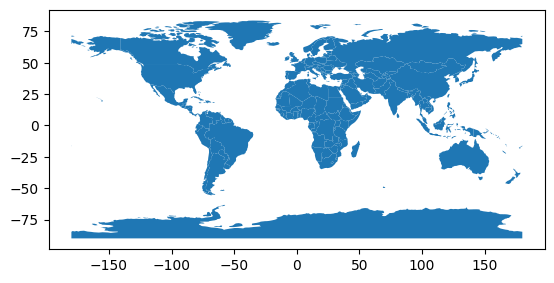

In [82]:
gdf_world.plot()

### <font color="green">Convert the iss Dataframe to a GeoDataframe<font/>

<font color="Burgundy"> This step is crucial, we need to turn the Pandas Dataframe into a GeoPandas Dataframe so we can have the Geometry points to plot the path of the ISS.<font/>

In [83]:
# Turning the Pandas Dataframe into a GeoPandas Dataframe
future_iss_gdf = gpd.GeoDataFrame(df_orbit, geometry=gpd.points_from_xy(df_orbit.lon, df_orbit.lat))

In [84]:
future_iss_gdf

,t,lat,lon,land_flag,Country,surf_temp,cloud_cover,surf_press,rain,geometry
0,2025-01-15 22:44:05,-44.883662,-167.240863,False,Ocean,16.100000,94.856944,1005.979583,0.000000,POINT (-167.24086 -44.88366)
1,2025-01-15 22:47:05,-38.278004,-155.383790,False,Ocean,20.578472,16.256944,1015.156944,0.000000,POINT (-155.38379 -38.278)
2,2025-01-15 22:50:05,-30.695871,-145.450491,False,Ocean,23.483472,100.000000,1014.583472,0.000000,POINT (-145.45049 -30.69587)
3,2025-01-15 22:53:05,-22.413071,-136.967047,False,Ocean,26.188472,10.806944,1010.211528,0.000000,POINT (-136.96705 -22.41307)
4,2025-01-15 22:56:05,-13.641254,-129.573181,False,Ocean,26.600000,4.673611,1013.919583,0.000000,POINT (-129.57318 -13.64125)
5,2025-01-15 22:59:05,-4.536047,-122.950641,False,Ocean,24.998472,45.045833,1013.007639,0.000000,POINT (-122.95064 -4.53605)
6,2025-01-15 23:02:05,4.600452,-116.391152,False,Ocean,26.500000,64.138889,1010.806944,0.000000,POINT (-116.39115 4.60045)
7,2025-01-15 23:05:05,13.663485,-109.646051,False,Ocean,26.216944,96.152778,1014.433889,0.000000,POINT (-109.64605 13.66349)
8,2025-01-15 23:08:05,22.555236,-102.484280,True,Mexico,19.624861,0.808333,783.559583,0.000000,POINT (-102.48428 22.55524)
9,2025-01-15 23:11:05,30.853893,-93.950700,True,United States,10.089167,100.000000,1018.536944,0.181528,POINT (-93.9507 30.85389)


### <font color="green"> Plot future ISS path <font/>

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


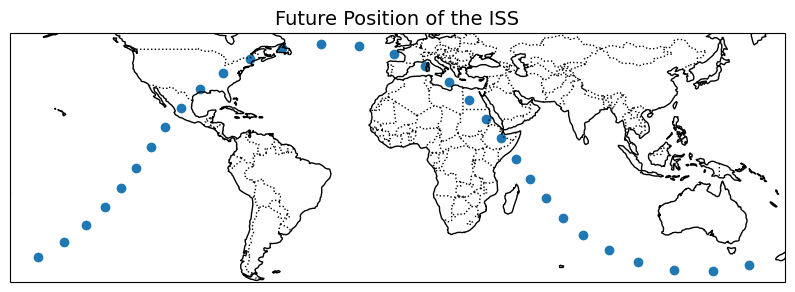

In [85]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(10, 10)
future_iss_gdf.plot(
    ax=ax
)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.coastlines()
plt.title('Future Position of the ISS', fontsize = 14);
plt.savefig('fig_iss_paths_no_countries')

<font color="brugendy"> We seperate the ocean and land to control the color we make the ocean plot.<font/>

In [86]:
ocean_plot = future_iss_gdf[future_iss_gdf['Country'] == 'Ocean']
ocean_plot

,t,lat,lon,land_flag,Country,surf_temp,cloud_cover,surf_press,rain,geometry
0,2025-01-15 22:44:05,-44.883662,-167.240863,False,Ocean,16.100000,94.856944,1005.979583,0.000000,POINT (-167.24086 -44.88366)
1,2025-01-15 22:47:05,-38.278004,-155.383790,False,Ocean,20.578472,16.256944,1015.156944,0.000000,POINT (-155.38379 -38.278)
2,2025-01-15 22:50:05,-30.695871,-145.450491,False,Ocean,23.483472,100.000000,1014.583472,0.000000,POINT (-145.45049 -30.69587)
3,2025-01-15 22:53:05,-22.413071,-136.967047,False,Ocean,26.188472,10.806944,1010.211528,0.000000,POINT (-136.96705 -22.41307)
4,2025-01-15 22:56:05,-13.641254,-129.573181,False,Ocean,26.600000,4.673611,1013.919583,0.000000,POINT (-129.57318 -13.64125)
5,2025-01-15 22:59:05,-4.536047,-122.950641,False,Ocean,24.998472,45.045833,1013.007639,0.000000,POINT (-122.95064 -4.53605)
6,2025-01-15 23:02:05,4.600452,-116.391152,False,Ocean,26.500000,64.138889,1010.806944,0.000000,POINT (-116.39115 4.60045)
7,2025-01-15 23:05:05,13.663485,-109.646051,False,Ocean,26.216944,96.152778,1014.433889,0.000000,POINT (-109.64605 13.66349)
13,2025-01-15 23:23:05,51.264531,-39.426127,False,Ocean,6.238472,53.076389,999.700000,0.000000,POINT (-39.42613 51.26453)
14,2025-01-15 23:26:05,50.284397,-22.145053,False,Ocean,13.100000,100.000000,1010.869583,2.712917,POINT (-22.14505 50.2844)


In [87]:
land_plot = future_iss_gdf[future_iss_gdf['Country'] != 'Ocean']
land_plot

,t,lat,lon,land_flag,Country,surf_temp,cloud_cover,surf_press,rain,geometry
8,2025-01-15 23:08:05,22.555236,-102.484280,True,Mexico,19.624861,0.808333,783.559583,0.000000,POINT (-102.48428 22.55524)
9,2025-01-15 23:11:05,30.853893,-93.950700,True,United States,10.089167,100.000000,1018.536944,0.181528,POINT (-93.9507 30.85389)
10,2025-01-15 23:14:05,38.327713,-83.699494,True,United States,-9.281667,3.295833,995.806111,0.000000,POINT (-83.69949 38.32771)
11,2025-01-15 23:17:05,44.672302,-71.437468,True,United States,-12.800000,100.000000,931.085417,0.000000,POINT (-71.43747 44.6723)
12,2025-01-15 23:20:05,49.569626,-56.872606,True,Canada,-4.400000,98.000000,972.766944,0.000000,POINT (-56.87261 49.56963)
18,2025-01-15 23:38:05,26.248359,27.507284,True,Egypt,13.955694,70.209722,985.536528,0.000000,POINT (27.50728 26.24836)
19,2025-01-15 23:41:05,17.645964,35.346050,True,Sudan,22.457639,0.000000,964.294583,0.000000,POINT (35.34605 17.64596)
20,2025-01-15 23:44:05,8.682468,42.342360,True,Ethiopia,15.906111,0.000000,872.012222,0.000000,POINT (42.34236 8.68247)


<ipython-input-88-1b4930bb6c87>:5: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ocean_plot.plot(column='Country', ax=ax, linewidth=0.5, color='blue', alpha=0.2)


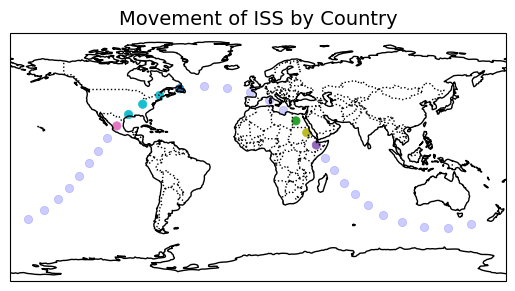

In [88]:
g, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(15, 10)

land_plot.plot(column='Country', ax=ax, linewidth=0.5)
ocean_plot.plot(column='Country', ax=ax, linewidth=0.5, color='blue', alpha=0.2)

ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.coastlines()
ax.set_global()
plt.title('Movement of ISS by Country', fontsize = 14);

In [89]:
future_iss_gdf

,t,lat,lon,land_flag,Country,surf_temp,cloud_cover,surf_press,rain,geometry
0,2025-01-15 22:44:05,-44.883662,-167.240863,False,Ocean,16.100000,94.856944,1005.979583,0.000000,POINT (-167.24086 -44.88366)
1,2025-01-15 22:47:05,-38.278004,-155.383790,False,Ocean,20.578472,16.256944,1015.156944,0.000000,POINT (-155.38379 -38.278)
2,2025-01-15 22:50:05,-30.695871,-145.450491,False,Ocean,23.483472,100.000000,1014.583472,0.000000,POINT (-145.45049 -30.69587)
3,2025-01-15 22:53:05,-22.413071,-136.967047,False,Ocean,26.188472,10.806944,1010.211528,0.000000,POINT (-136.96705 -22.41307)
4,2025-01-15 22:56:05,-13.641254,-129.573181,False,Ocean,26.600000,4.673611,1013.919583,0.000000,POINT (-129.57318 -13.64125)
5,2025-01-15 22:59:05,-4.536047,-122.950641,False,Ocean,24.998472,45.045833,1013.007639,0.000000,POINT (-122.95064 -4.53605)
6,2025-01-15 23:02:05,4.600452,-116.391152,False,Ocean,26.500000,64.138889,1010.806944,0.000000,POINT (-116.39115 4.60045)
7,2025-01-15 23:05:05,13.663485,-109.646051,False,Ocean,26.216944,96.152778,1014.433889,0.000000,POINT (-109.64605 13.66349)
8,2025-01-15 23:08:05,22.555236,-102.484280,True,Mexico,19.624861,0.808333,783.559583,0.000000,POINT (-102.48428 22.55524)
9,2025-01-15 23:11:05,30.853893,-93.950700,True,United States,10.089167,100.000000,1018.536944,0.181528,POINT (-93.9507 30.85389)


# <font color="red"> Add Nightshade plot <font/>


### <font color="green"> We use the nightshade libary that comes from cartopy. This will add the current shade on the map. Shows where in the world it is day time or night time.<font/>

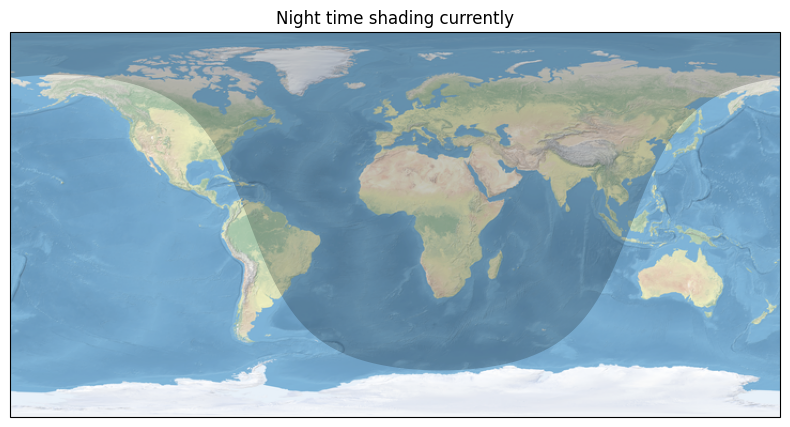

In [90]:

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#date = dt.datetime(1999, 12, 31, 12)

ax.set_title(f'Night time shading currently')
ax.stock_img()
ax.add_feature(Nightshade(future_iss_gdf.t[0], alpha=0.2))
plt.show()

### <font color="green"> Combine night time shade plot and iss path plot <font/>

<ipython-input-91-8bad40f84fe5>:5: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ocean_plot.plot(column='Country', ax=ax, linewidth=0.5, color='blue',alpha=0.15)


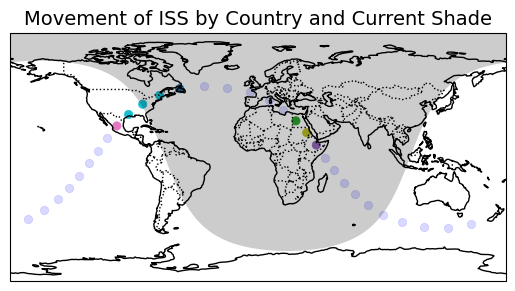

In [91]:
g, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(15, 10)

land_plot.plot(column='Country', ax=ax, linewidth=0.5)
ocean_plot.plot(column='Country', ax=ax, linewidth=0.5, color='blue',alpha=0.15)

ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(Nightshade(future_iss_gdf.t[0], alpha=0.2))
ax.coastlines()
ax.set_global()
plt.title('Movement of ISS by Country and Current Shade', fontsize = 14);


### <font color="green"> Ploting country names <font/>

In [92]:
country_names = list(land_plot['Country'].unique())
country_names

['Mexico', 'United States', 'Canada', 'Egypt', 'Sudan', 'Ethiopia']

In [93]:
out_format = "ISO3"
country_acronyms = [coco.convert(x, to=out_format, not_found=None) for x in country_names]

In [94]:
country_acronyms

['MEX', 'USA', 'CAN', 'EGY', 'SDN', 'ETH']

In [95]:
mask = gdf_world['ISO_A3'].isin(country_acronyms)
gdf_country_overpass = gdf_world[mask]

<Axes: >

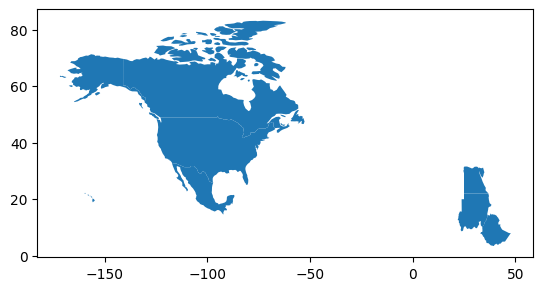

In [96]:
gdf_country_overpass.plot()

In [97]:
gdf_country_overpass['centroid'] = gdf_country_overpass.centroid
gdf_country_overpass

<ipython-input-97-3d5634fae09b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_country_overpass['centroid'] = gdf_country_overpass.centroid
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",POINT (-98.14238 61.46908)
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",POINT (-112.59944 45.70563)
14,Admin-0 country,1,3,Sudan,SDN,0,2,Sovereign country,1,Sudan,...,None,None,None,None,None,None,None,None,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",POINT (29.8626 15.99059)
27,Admin-0 country,1,2,Mexico,MEX,0,2,Sovereign country,1,Mexico,...,None,None,None,None,None,None,None,None,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",POINT (-102.57635 23.93537)
163,Admin-0 country,1,2,Egypt,EGY,0,2,Sovereign country,1,Egypt,...,None,None,None,None,None,None,None,None,"POLYGON ((36.86623 22, 32.9 22, 29.02 22, 25 2...",POINT (29.84446 26.50662)
165,Admin-0 country,1,2,Ethiopia,ETH,0,2,Sovereign country,1,Ethiopia,...,None,None,None,None,None,None,None,None,"POLYGON ((47.78942 8.003, 44.9636 5.00162, 43....",POINT (39.55126 8.654)


<ipython-input-98-a19fcae3b9fd>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_country_overpass.centroid.x, gdf_country_overpass.centroid.y, gdf_country_overpass.ISO_A3):


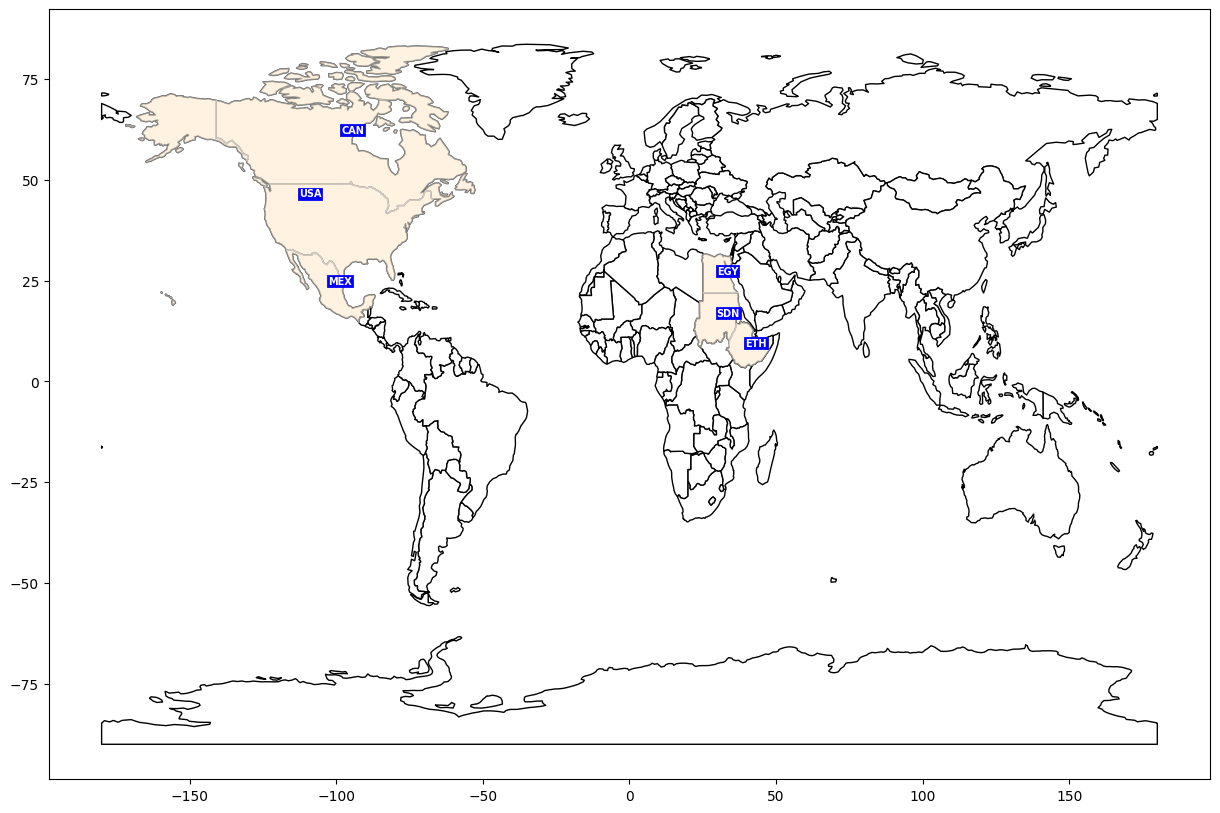

In [98]:
fig, ax = plt.subplots(1, figsize=(25,10))
base = gdf_world.plot(ax=ax, color='white', edgecolor='black',)
gdf_country_overpass.plot(color='#ffe4bd', ax=base, edgecolor='white', alpha=0.45)

for x, y, label in zip(gdf_country_overpass.centroid.x, gdf_country_overpass.centroid.y, gdf_country_overpass.ISO_A3):
    base.annotate(label, xy=(x, y), xytext=(-0.25, 0.5),
                  color="white",
                  bbox=dict(boxstyle="square,pad=0",
                      fc="blue", ec="blue", lw=2),
                  weight="bold",
                  size="7",
                  textcoords="offset points");

#fig.savefig('fig_CountryNames_ThreePoints')


In [99]:
!ls


fig_iss_paths_no_countries.png	sample_data


<ipython-input-101-a7fde30fe638>:5: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ocean_plot.plot(column='Country', ax=ax, linewidth=0.5, color='blue', alpha=0.015)
<ipython-input-101-a7fde30fe638>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_country_overpass.centroid.x, gdf_country_overpass.centroid.y, gdf_country_overpass.ISO_A3):


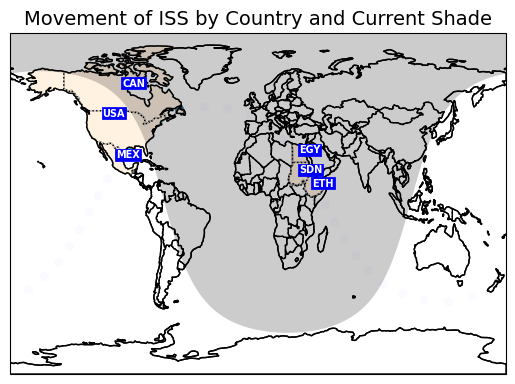

In [101]:
g, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(20, 15)

land_plot.plot(column='Country', ax=ax, linewidth=0.5)
ocean_plot.plot(column='Country', ax=ax, linewidth=0.5, color='blue', alpha=0.015)
base = gdf_world.plot(ax=ax, color='white', edgecolor='black',)
gdf_country_overpass.plot(color='#ffe4bd', ax=base, edgecolor='white', alpha=0.45)

for x, y, label in zip(gdf_country_overpass.centroid.x, gdf_country_overpass.centroid.y, gdf_country_overpass.ISO_A3):
    base.annotate(label, xy=(x, y), xytext=(-0.25, 0.5),
                  color="white",
                  bbox=dict(boxstyle="square,pad=0",
                      fc="blue", ec="blue", lw=2),
                  weight="bold",
                  size="7",
                  textcoords="offset points");

ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(Nightshade(future_iss_gdf.t[0], alpha=0.2))
ax.coastlines()
ax.set_global()
plt.title('Movement of ISS by Country and Current Shade', fontsize = 14);

# ***Data Analytics***

# <font color="red"> How many obrits does the NASA XML file have? (both full and partial orbits) <font/>

## <font color="red"> Function <font/>
### <font color="green"> 1. count_orbit <font/>
#### <font color="blue"> A function that counts the amount of time in the dataframe where the longitude switched from positive to negative. This is how we determine the orbits. <font/>

In [108]:
df

,Date,lat,lon
0,2025-01-13 12:00:00,-36.364652,24.638470
1,2025-01-13 12:04:00,-25.696634,36.786255
2,2025-01-13 12:08:00,-14.020421,46.692010
3,2025-01-13 12:12:00,-1.882071,55.529168
4,2025-01-13 12:16:00,10.320321,64.235957
...,...,...,...
5397,2025-01-28 11:45:00,28.220393,129.759904
5398,2025-01-28 11:49:00,16.683787,140.084681
5399,2025-01-28 11:53:00,4.590958,149.088738
5400,2025-01-28 11:57:00,-7.635565,157.752655


In [117]:
def count_orbit(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']

    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            count += 1
    return count

In [174]:
xml_orbit = count_orbit(df)

<font color="brugendy"> Now we know the XML data has 217 orbits in total. However this includes the past and future<font/>

In [175]:
xml_orbit

217

<font color="brugendy"> Next we count the orbits for only future dates.<font/>

In [112]:
def future_dates(df: pd.DataFrame, nhours: int=3):
    """
    Collects future position of the ISS with nhours from current time and 6
    hours ahead of nhours

    Parameters
    ----------
    df : Pandas Dataframe
        Dataframe which contains a column with datetime objects.

    nhours: Int
        Number of hours you want to start collecting data from current time.

    Return
    ------
    df : Pandas DataFrame
        The DataFrame containing the time the International Space Station
        from current time + nhours to 6 hours ahead.
    """
    # String of the current time of day now
    start_date = dt.datetime.now() + dt.timedelta(hours=nhours)
    #end_date = start_date + dt.timedelta(hours=24)
    # Turns the date from a string object to a datetime object
    start_date = start_date.strftime("%m/%d/%Y %H:%M:%S")
    start_date = pd.to_datetime(start_date, format='%m/%d/%Y %H:%M:%S')



    return df[(start_date <= df['Date'])]

In [113]:
future_df = future_dates(df, nhours=0)

In [176]:
future_df = future_df.reset_index()
future_df

,index,Date,lat,lon
0,823,2025-01-15 18:52:00,44.836113,71.986445
1,824,2025-01-15 18:56:00,35.915458,87.711660
2,825,2025-01-15 19:00:00,25.153169,99.759760
3,826,2025-01-15 19:04:00,13.421233,109.607447
4,827,2025-01-15 19:08:00,1.261397,118.422981
...,...,...,...,...
4574,5397,2025-01-28 11:45:00,28.220393,129.759904
4575,5398,2025-01-28 11:49:00,16.683787,140.084681
4576,5399,2025-01-28 11:53:00,4.590958,149.088738
4577,5400,2025-01-28 11:57:00,-7.635565,157.752655


In [177]:
future_orbits = count_orbit(future_df)

In [178]:
future_orbits

184

## <font color="red"> Function <font/>
### <font color="green"> 1. count_countrys <font/>
#### <font color="blue"> A function that counts the amount of countrys the ISS flys over. <font/>

In [147]:
def count_countrys(df: pd.DataFrame):
    previous_name = ""
    country_count = 0
    for name, land_flag in zip(df['Country'], df['land_flag']):
        if name != previous_name and land_flag == True:
            print(name)
            country_count += 1
        previous_name = name
    print(country_count)


In [148]:
get_countrys(df_orbit)

Mexico
United States
Canada
Egypt
Sudan
Ethiopia
6


# <font color="red">  Check amount of time an orbit takes <font/>
#### <font color="blue"> The ISS fully orbits around the earth in 90 minutes. We will check how long a full orbit takes with our data.<font/>

In [151]:
df_time = df_orbit['t']

In [159]:
df_timetail = df_time.tail(1)

In [168]:
orbit_time = df_timetail - df_time[0]

In [169]:
orbit_time = orbit_time.reset_index()

<font color="brugendy"> Notice how the amount of the it took for the ISS to orbit the around is 1 hour and 30 minutes, or 90 minutes in total. We can see this data is acurate with how long the ISS takes to orbit the earth. <font/>

In [171]:
orbit_time

,index,t
0,30,0 days 01:30:00
